## Dissatisfacton Remediation Text Analytics Solution
##### Data Science & Analytics [DSA]
##### Author: Klussendorf, H.
##### Date: Q3 2021

In [ ]:
pip install textblob

In [8]:
pip install torch

     |████████████████████████████████| 881.9 MB 2.1 kB/s  eta 0:00:01    |▉                               | 22.5 MB 13.8 MB/s eta 0:01:03     |█▉                              | 51.5 MB 13.8 MB/s eta 0:01:01     |███▍                            | 92.8 MB 29.3 MB/s eta 0:00:27     |███▌                            | 95.7 MB 29.3 MB/s eta 0:00:27     |███████▌                        | 206.4 MB 69.0 MB/s eta 0:00:10     |██████████████████▌             | 508.5 MB 38.6 MB/s eta 0:00:10     |███████████████████████         | 633.3 MB 60.0 MB/s eta 0:00:05     |███████████████████████         | 636.0 MB 58.7 MB/s eta 0:00:05�██████████▏        | 638.9 MB 58.7 MB/s eta 0:00:05     |████████████████████████▍       | 671.1 MB 58.7 MB/s eta 0:00:04     |████████████████████████████    | 774.7 MB 70.0 MB/s eta 0:00:02     |███████████████████████████████▉| 877.7 MB 30.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you ma

In [9]:
pip install transformers

     |████████████████████████████████| 3.5 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 73.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 43.6 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install flair

  Using cached flair-0.10-py3-none-any.whl (322 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached gdown-3.12.2-py3-none-any.whl
  Using cached bpemb-0.3.3-py3-none-any.whl (19 kB)
  Using cached conllu-4.4.1-py2.py3-none-any.whl (15 kB)
  Using cached more_itertools-8.8.0-py3-none-any.whl (48 kB)
  Using cached Janome-0.4.1-py2.py3-none-any.whl (19.7 MB)
  Using cached ftfy-6.1.1-py3-none-any.whl (53 kB)
  Using cached mpld3-0.3-py3-none-any.whl
  Using cached sqlitedict-1.7.0-py3-none-any.whl
  Using cached konoha-4.6.5-py3-none-any.whl (20 kB)
  Using cached gensim-4.1.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Using cached Wikipedia_API-0.5.4-py3-none-any.whl
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached segtok-1.5.11-py3-none-any.whl (24 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


Client Advocacy [CA], would like to understand the current landscape of complaints and expressions of dissatisfaction across CA. Previous research efforts delivered anedotal evidence about the root cause and frequency of poor customer experiences. DSA proposes a solution that deliver a comprehensive view of dissatisfaction in Case Tracker emails.

Case Tracker is a case management tool used by customer service representatives [CSR] and analysts in CA. CAPE, RCS, NB, and PB departments within CA - some departments use additional case management tools such as BAS. In Case Tracker, inbound and outbound email correspondence is stored. Outbound emails originate from NM CSRs.  Inbound emails are identified as those sent by anyone other than the recipient. 

The business problem that we are solving for is field representative [FR] and customer dissatisfaction; hence, the scope of the analysis is limited to inbound emails from FRs and customers. During the exploratory data analysis, it was discovered that more than half of the inbound emails were auto-replies and other types of emails outside this scope of interest. These emails were filtered out to ensure that the focus of the analysis was meaningful. Additionally, the first 256 characters of the emails were used instead of the full email body. This is because the full email body contains tremendous amounts of superfluous text such as signature blocks and legal disclaimers. In 2021, approximately 20,000 meaningful inbound Case Tracker emails from customers and field representatives were recieved each month. 

In this notebook, the DSA text analytics methodology and results are summarized; highlighting Sentiment Modeling, and Topic Modeling.

#### Source Data

The Case Tracker email data is sourced through an API that was facilitated by Softare Engineers. The Case Tracker email data can also be found in additional locations: an {redacted}, and several tables in the {redacted}. In this notebook, a csv file with labelled email data is used. The final model leverages AWS Jupyter notebook environment, and S3 datasource.

#### Import Data

In [1]:
#import data
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('casetracker_email.csv', 
                 usecols = ['COMMUNICATION_ID', 'EMAIL_PREVIEW', 'Sentiment (-1, 0, 1)', 'Dissatisfaction', 'Confusion'])
df.head()

COMMUNICATION_ID                                      EMAIL_PREVIEW  \
0         188187894  ""What is your direct line? Can you call me or...   
1         187722355  ""{{NAME-2170}} am confused with this email as...   
2         187799130  ""Hi {{NAME-9193}}, disgard this email.  I mix...   
3         188099180  ""Can someone please tell me why there are now...   
4         187972030  ""I don't think this is the correct insured on...   

   Sentiment (-1, 0, 1)  Dissatisfaction  Confusion  
0                   NaN              1.0        1.0  
1                   NaN              NaN        1.0  
2                   NaN              NaN        1.0  
3                   NaN              1.0        1.0  
4                   NaN              1.0        1.0

In [3]:
#create a dataframe with sentiment columns
df_sentiment = df[['COMMUNICATION_ID', 'EMAIL_PREVIEW', 'Sentiment (-1, 0, 1)']]

#Drop rows with missing Sentiment score
df_sentiment = df_sentiment.dropna()

In [4]:
#Change Ground Truth Labels to string type
df_sentiment['Sentiment (-1, 0, 1)'] = df_sentiment['Sentiment (-1, 0, 1)'].astype('int64')
df_sentiment['Sentiment (-1, 0, 1)'] = df_sentiment['Sentiment (-1, 0, 1)'].astype('string')

In [5]:
#Review new sentiment dataframe
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 9 to 20765
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COMMUNICATION_ID      1011 non-null   int64 
 1   EMAIL_PREVIEW         1011 non-null   object
 2   Sentiment (-1, 0, 1)  1011 non-null   string
dtypes: int64(1), object(1), string(1)
memory usage: 31.6+ KB


#### Sentiment Models

Source Material: https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb

"VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."

##### NLTK

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator

In [10]:
nltk_analyser = SentimentIntensityAnalyzer()
df_sentiment["NLTK sentiment_score"] = df_sentiment["EMAIL_PREVIEW"].apply(lambda x: nltk_analyser.polarity_scores(x)["compound"])
df_sentiment["NLTK sentiment"] = np.select([df_sentiment["NLTK sentiment_score"] < 0, df_sentiment["NLTK sentiment_score"] == 0, df_sentiment["NLTK sentiment_score"] > 0],
                           ['-1', '0', '1'])

##### Textblob

In [11]:
from textblob import TextBlob

In [12]:
df_sentiment["Textblob sentiment_score"] = df_sentiment["EMAIL_PREVIEW"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_sentiment["Textblob sentiment"] = np.select([df_sentiment["Textblob sentiment_score"] < 0, df_sentiment["Textblob sentiment_score"] == 0, df_sentiment["Textblob sentiment_score"] > 0],
                           ['-1', '0', '1'])

##### Flair

In [13]:
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
flair_analyser = TextClassifier.load('sentiment')

def flair_prediction(x):
    sentence = Sentence(x)
    flair_analyser.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "1"
    elif "NEGATIVE" in str(score):
        return "-1"
    else:
        return "0"
df_sentiment["flair sentiment"] = df_sentiment["EMAIL_PREVIEW"].apply(flair_prediction)

##### Hugging Face - Negative

In [12]:
import transformers
#import tensorflow as tf
from transformers import pipeline

In [ ]:
hf_analyser_neg = pipeline("zero-shot-classification")
neg = ["negative"]

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [ ]:
tmp = [hf_analyser_neg(x, neg) for x in df_sentiment["EMAIL_PREVIEW"]]

In [ ]:
data_neg = []
data_neg = pd.DataFrame(tmp, columns=['sequence', 'labels', 'scores'])

df_sentiment['hf_negative_score'] = np.nan
df_sentiment['hf_negative_score'][:] = data_neg['scores'].astype('string')
df_sentiment.hf_negative_score = df_sentiment.hf_negative_score.str.strip('[]')

In [ ]:
df_sentiment['hf_negative_score'] = df_sentiment['hf_negative_score'].astype('float64')

In [ ]:
def conditions(x):
    return [
     x >= 0.89,
    (x < 0.89) & (x >= 0.11),
     x < 0.11]
choices = ['-1', '0', '1']

df_sentiment["hf_negative_sentiment"] = np.select(conditions(df_sentiment['hf_negative_score']), choices, default='Null')

##### Hugging Face - Positive

In [ ]:
hf_analyser_pos = pipeline("zero-shot-classification")
pos = ["positive"]

In [ ]:
tmp = [hf_analyser_pos(x, pos) for x in df_sentiment["EMAIL_PREVIEW"]]

In [ ]:
data_pos = []
data_pos = pd.DataFrame(tmp, columns=['sequence', 'labels', 'scores'])

df_sentiment['hf_positive_score'] = np.nan
df_sentiment['hf_positive_score'][:] = data_pos['scores'].astype('string')
df_sentiment.hf_positive_score = df_sentiment.hf_positive_score.str.strip('[]')

In [ ]:
df_sentiment['hf_positive_score'] = df_sentiment['hf_positive_score'].astype('float64')

In [ ]:
def conditions(x):
    return [
     x >= 0.89,
    (x < 0.89) & (x >= 0.11),
     x < 0.11]
choices = ['1', '0', '-1']

df_sentiment["hf_positive_sentiment"] = np.select(conditions(df_sentiment['hf_positive_score']), choices, default='Null')

In [ ]:
##### Hugging Face - Difference Between Positive and Negative

In [ ]:
df_sentiment['hf_diff_score']= df_sentiment['hf_positive_score'] - df_sentiment['hf_negative_score']

In [ ]:
def conditions(x):
    return [
     x >= 0.89,
    (x < 0.89) & (x >= -0.89),
     x < -0.89]
choices = ['1', '0', '-1']

df_sentiment["hf_sentiment"] = np.select(conditions(df_sentiment['hf_diff_score']), choices, default='Null')

##### Evaluate Sentiment Model Performance

In [ ]:
df_sentiment.head(5)

In [ ]:
#### Sentiment Model Performance

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##### NLTK

In [ ]:
print(classification_report(df_sentiment['Sentiment (-1, 0, 1)'], df_sentiment['NLTK sentiment']))

##### Textblob

In [ ]:
print(classification_report(df_sentiment['Sentiment (-1, 0, 1)'], df_sentiment['Textblob sentiment']))

##### Flair

In [ ]:
print(classification_report(df_sentiment['Sentiment (-1, 0, 1)'], df_sentiment['flair sentiment']))

##### Hugging Face - Positive

In [ ]:
print(classification_report(df_sentiment['Sentiment (-1, 0, 1)'], df_sentiment['hf_positive_sentiment']))

##### Hugging Face - Negative

In [ ]:
print(classification_report(df_sentiment['Sentiment (-1, 0, 1)'], df_sentiment['hf_negative_sentiment']))

##### Hugging Face - Difference

In [ ]:
print(classification_report(df_sentiment['Sentiment (-1, 0, 1)'], df_sentiment['hf_sentiment']))

#### Classification Models

##### Dissatisfaction

In [10]:
#create a dataframe
df_dissatisfaction = df[['COMMUNICATION_ID', 'EMAIL_PREVIEW', 'Dissatisfaction']]

#Drop rows with missing score
df_dissatisfaction = df_dissatisfaction.dropna()

In [13]:
df_dissatisfaction['Dissatisfaction'] = df_dissatisfaction['Dissatisfaction'].astype('int64')
df_dissatisfaction['Dissatisfaction'] = df_dissatisfaction['Dissatisfaction'].astype('string')

In [14]:
df_dissatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 20765
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COMMUNICATION_ID  2002 non-null   int64 
 1   EMAIL_PREVIEW     2002 non-null   object
 2   Dissatisfaction   2002 non-null   string
dtypes: int64(1), object(1), string(1)
memory usage: 62.6+ KB


In [15]:
hf_analyser = pipeline("zero-shot-classification")
diss = ['Dissatisfaction']

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [16]:
tmp = [hf_analyser(x, diss) for x in df_dissatisfaction["EMAIL_PREVIEW"]]

In [17]:
data_diss = []
data_diss = pd.DataFrame(tmp, columns=['sequence', 'labels', 'scores'])

df_dissatisfaction['hf_score'] = np.nan
df_dissatisfaction['hf_score'][:] = data_diss['scores'].astype('string')
df_dissatisfaction.hf_score = df_dissatisfaction.hf_score.str.strip('[]')

<ipython-input-17-2e5b4d2bddc8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dissatisfaction['hf_score'][:] = data_diss['scores'].astype('string')


In [18]:
df_dissatisfaction['hf_score'] = df_dissatisfaction['hf_score'].astype('float64')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hf_score', ylabel='Density'>

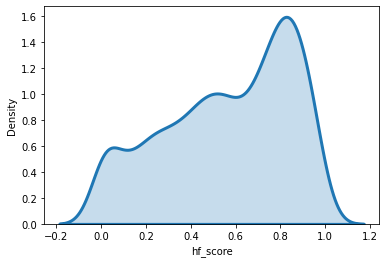

In [23]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

labels = df_dissatisfaction['Dissatisfaction'].unique()

sns.distplot(df_dissatisfaction['hf_score'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = labels)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hf_score', ylabel='Density'>

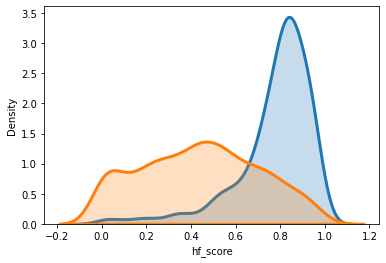

In [32]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

pos = df_dissatisfaction[df_dissatisfaction['Dissatisfaction'] == '1']
neg = df_dissatisfaction[df_dissatisfaction['Dissatisfaction'] == '0']

sns.distplot(pos['hf_score'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(neg['hf_score'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

In [43]:
def conditions(x):
    return [
     x >= 0.85,
    (x < 0.85)]
choices = ['1', '0']

df_dissatisfaction["hf_dissatisfied"] = np.select(conditions(df_dissatisfaction['hf_score']), choices, default='Null')
df_dissatisfaction["hf_dissatisfied"] = df_dissatisfaction["hf_dissatisfied"].astype('int64')
df_dissatisfaction["hf_dissatisfied"] = df_dissatisfaction["hf_dissatisfied"].astype('string')

In [44]:
print(classification_report(df_dissatisfaction["Dissatisfaction"], df_dissatisfaction["hf_dissatisfied"]))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1254
           1       0.76      0.36      0.49       748

    accuracy                           0.72      2002
   macro avg       0.73      0.64      0.65      2002
weighted avg       0.73      0.72      0.69      2002



##### Confusion

In [ ]:
#create a dataframe
df_confusion = df[['COMMUNICATION_ID', 'EMAIL_PREVIEW', 'Confusion']]

#Drop rows with missing score
df_confusion = df_confusion.dropna()

In [ ]:
df_confusion['Confusion'] = df_confusion['Confusion'].astype('int64')
df_confusion['Confusion'] = df_confusion['Confusion'].astype('string')

In [ ]:
conf = ['confusion']

In [ ]:
tmp = [hf_analyser(x, conf) for x in df_confusion["EMAIL_PREVIEW"]]

In [ ]:
data_conf = []
data_conf = pd.DataFrame(tmp, columns=['sequence', 'labels', 'scores'])

df_confusion['hf_score'] = np.nan
df_confusion['hf_score'][:] = data_conf['scores'].astype('string')
df_confusion.hf_score = df_confusion.hf_score.str.strip('[]')

In [ ]:
df_confusion['hf_score'] = df_confusion['hf_score'].astype('float64')

In [ ]:
def conditions(x):
    return [
     x >= 0.89,
    (x < 0.89)]
choices = ['1', '0']

df_confusion['hf_confusion'] = np.select(conditions(df_confusion['hf_score']), choices, default='Null')
df_confusion['hf_confusion'] = df_confusion['hf_confusion'].astype('int64')
df_confusion['hf_confusion'] = df_confusion['hf_confusion'].astype('string')

In [ ]:
print(classification_report(df_confusion['Confusion'], df_confusion['hf_confusion']))